In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
bank = pd.read_csv('bank-full.csv',sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
bank.shape

(45211, 17)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [7]:
col = ['default','housing','loan','y']
def convert(x):
    return x.map({'yes':1, 'no':0})
bank[col]=bank[col].apply(convert)

In [8]:
bank1 = bank.select_dtypes(include=['object'])
bank1.head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown


In [9]:
dummies = pd.get_dummies(bank1,drop_first=True).head()

In [10]:
bank = pd.concat([bank,dummies],axis=1)
bank.drop(columns=bank1.columns,axis=1,inplace=True)

In [11]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,0,29,1,0,5,151,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,0,2,1,1,5,76,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,0,1506,1,0,5,92,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,0,1,0,0,5,198,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
bank.dtypes

age                      int64
default                  int64
balance                  int64
housing                  int64
loan                     int64
day                      int64
duration                 int64
campaign                 int64
pdays                    int64
previous                 int64
y                        int64
job_blue-collar        float64
job_entrepreneur       float64
job_housemaid          float64
job_management         float64
job_retired            float64
job_self-employed      float64
job_services           float64
job_student            float64
job_technician         float64
job_unemployed         float64
job_unknown            float64
marital_married        float64
marital_single         float64
education_secondary    float64
education_tertiary     float64
education_unknown      float64
contact_telephone      float64
contact_unknown        float64
month_aug              float64
month_dec              float64
month_feb              float64
month_ja

In [13]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  int64  
 1   default              45211 non-null  int64  
 2   balance              45211 non-null  int64  
 3   housing              45211 non-null  int64  
 4   loan                 45211 non-null  int64  
 5   day                  45211 non-null  int64  
 6   duration             45211 non-null  int64  
 7   campaign             45211 non-null  int64  
 8   pdays                45211 non-null  int64  
 9   previous             45211 non-null  int64  
 10  y                    45211 non-null  int64  
 11  job_blue-collar      5 non-null      float64
 12  job_entrepreneur     5 non-null      float64
 13  job_housemaid        5 non-null      float64
 14  job_management       5 non-null      float64
 15  job_retired          5 non-null     

In [14]:
bank.shape

(45211, 43)

<AxesSubplot:ylabel='previous'>

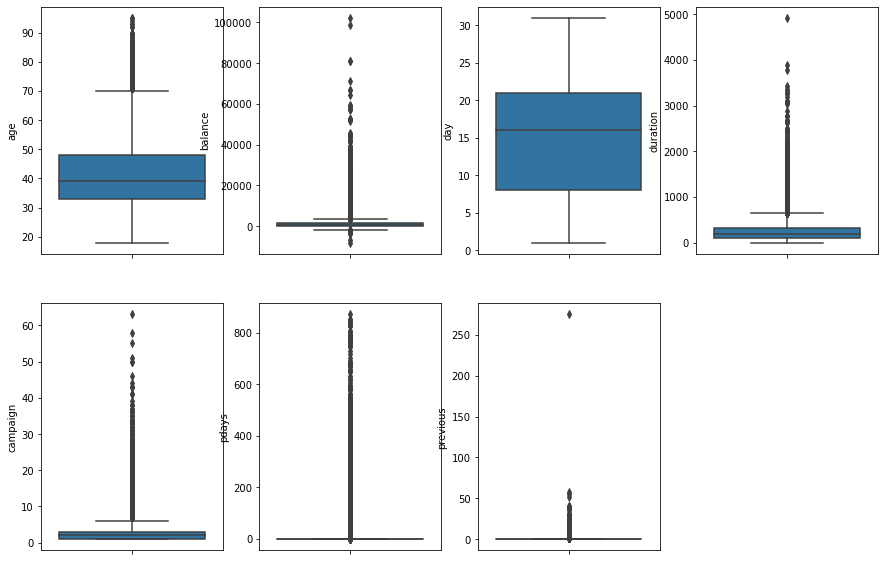

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data = bank)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data = bank)
plt.subplot(2,4,3)
sns.boxplot(y='day',data = bank)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data = bank)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data = bank)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data = bank)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data = bank)

There are lot of outliers present in the dataframe but we cant drop them because of the very large quantity and are important for model making

In [16]:
x = bank.drop(columns='y').dropna(axis=1,how='any')
y = bank['y']

In [17]:
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
0,58,0,2143,1,0,5,261,1,-1,0
1,44,0,29,1,0,5,151,1,-1,0
2,33,0,2,1,1,5,76,1,-1,0
3,47,0,1506,1,0,5,92,1,-1,0
4,33,0,1,0,0,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0
45207,71,0,1729,0,0,17,456,2,-1,0
45208,72,0,5715,0,0,17,1127,5,184,3
45209,57,0,668,0,0,17,508,4,-1,0


In [18]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 100,test_size = 0.25)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((33908, 10), (11303, 10), (33908,), (11303,))

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(x_train[['age','balance','day','duration','campaign','pdays','previous']])

In [23]:
log_model = LogisticRegression()
log_model.fit(x,y)

LogisticRegression()

In [24]:
y_train_pred = log_model.predict(x_train)
y_test_pred = log_model.predict(x_test)
print('y_train_pred: {}'.format(y_train_pred))
print('y_test_pred: {}'.format(y_test_pred))

y_train_pred: [0 0 0 ... 0 0 0]
y_test_pred: [0 0 0 ... 0 0 0]


In [25]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     29928
           1       0.00      0.00      0.00      3980

    accuracy                           0.88     33908
   macro avg       0.44      0.50      0.47     33908
weighted avg       0.78      0.88      0.83     33908



In [26]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9994
           1       0.56      0.18      0.27      1309

    accuracy                           0.89     11303
   macro avg       0.73      0.58      0.61     11303
weighted avg       0.86      0.89      0.86     11303



In [27]:
print(confusion_matrix(y_test,y_test_pred))

[[9809  185]
 [1075  234]]


In [28]:
import statsmodels.api as sm
logit = sm.GLM(y_train,x_train,family = sm.families.Binomial())
logit = logit.fit()
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                33908
Model:                            GLM   Df Residuals:                    33898
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12233.
Date:                Sat, 28 Aug 2021   Deviance:                       24466.
Time:                        18:25:10   Pearson chi2:                 1.32e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.1870      0.015    -12.486      0.000      -0.216      -0.158
default       -1.5958      0.202     -7.912      0.000      -1.991      -1.200
balance       -0.0232      0.015     -1.591      0.112      -0.052       0.005
housing       -2.9331      0.036    -82.323      0.000      -3.003      -2.863
loan          -1.9266      0.064    -30.182      0.000      -2.052      -1.801
day           -0.0317      0.016     -1.971      0.049      -0.063      -0.000
duration       0.9811      0.018     54.471      0.000       0.946       1.016
campaign      -0.1356      0.020     -6.701      0.000      -0.175      -0.096
pdays          0.3947      0.019     20.949      0.000       0.358       0.432
previous       0.1363      0.022      6.266      0.000       0.094       0.179
==============================================================================
"""

In [29]:
log = sm.GLM(y_test,x_test,family = sm.families.Binomial())
res = log.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                11303
Model:                            GLM   Df Residuals:                    11293
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3271.4
Date:                Sat, 28 Aug 2021   Deviance:                       6542.8
Time:                        18:25:10   Pearson chi2:                 4.97e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0414      0.002    -21.766      0.000      -0.045      -0.038
default       -0.2108      0.262     -0.805      0.421      -0.724       0.302
balance     1.149e-05   1.14e-05      1.007      0.314   -1.09e-05    3.38e-05
housing       -1.4444      0.068    -21.355      0.000      -1.577      -1.312
loan          -0.7730      0.108     -7.167      0.000      -0.984      -0.562
day           -0.0219      0.004     -5.989      0.000      -0.029      -0.015
duration       0.0035      0.000     30.676      0.000       0.003       0.004
campaign      -0.2473      0.023    -10.853      0.000      -0.292      -0.203
pdays          0.0023      0.000      7.242      0.000       0.002       0.003
previous       0.0892      0.016      5.539      0.000       0.058       0.121
==============================================================================
"""

0.5801256536962667


Text(0, 0.5, 'True Positive Rate')

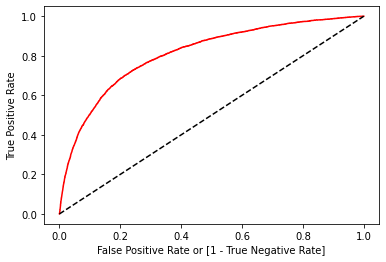

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba (x)[:,1])

auc = roc_auc_score(y_test, y_test_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

0.5


Text(0, 0.5, 'True Positive Rate')

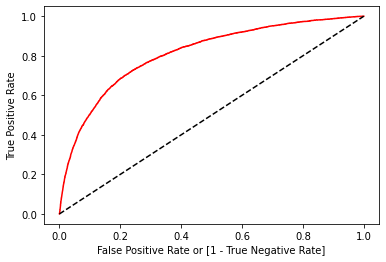

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba (x)[:,1])

auc = roc_auc_score(y_train, y_train_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')